# Logistic regression with stochastic solvers

In this notebook we wish to solve the logistic regression problem of the form:

$$J = - \frac{1}{n} \sum_i y^i log(\hat{y}^i) + (1-y^i) log(1-\hat{y}^i)
$$

where $\hat{y}^i = \sigma(x^i \theta)$, and compare different optimization algorithms, namely:

- SGD
- SAG
- SAGA

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
 
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from scipy.special import expit
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import load_svmlight_file
from stochmdd.stochmdd_numpy import SGD, SAG
from scipy.special import expit
from scipy.optimize import minimize
from logreg import *
np.random.seed(42)

## Half moon

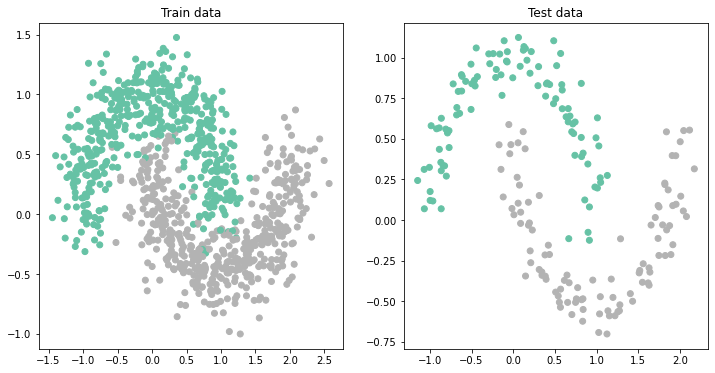

In [2]:
train_size = 1000 # Size of training data
test_size = 200 # Size of test data

X_train, y_train, X_test, y_test = make_train_test(train_size, test_size, noise=0.2)
y_train, y_test = y_train.ravel(), y_test.ravel()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Set2');
ax[1].set_title('Test data');

In [3]:
epochs = 1000
pars = np.random.normal(0,1,3)
pars[2] = 0 # no bias

logreg = LogReg(X_train, y_train, nobias=True)
optimizer = SGD(pars, 1)

for epoch in np.arange(epochs):
    # Compute gradient
    dpars = logreg.grad(pars)
    
    # Update model
    optimizer.step(dpars)

print(pars)

[ 1.48001372 -4.32250784  0.        ]


(0.864, 0.865)

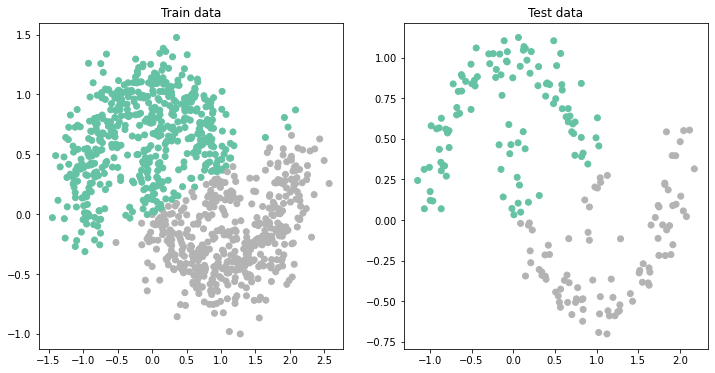

In [4]:
ypredtrain = logreg.fun(pars)[0]
ypredtest = logreg.fun(pars, X=X_test, y=y_test)[0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=np.where(ypredtrain>0.5, 1, 0), cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=np.where(ypredtest>0.5, 1, 0), cmap='Set2')
ax[1].set_title('Test data');

accuracy_score(y_train, np.where(ypredtrain>0.5, 1, 0)), accuracy_score(y_test, np.where(ypredtest>0.5, 1, 0))

## Data Orsay

In [5]:
mat_contents = sio.loadmat("data_orsay_2017.mat")

X = mat_contents["Xtrain"]
y = mat_contents["ytrain"].flatten()
y[y==-1] = 0

Xtest = mat_contents["Xtest"]
ytest = mat_contents["ytest"].flatten()

nx, nfeat = X.shape

In [6]:
datapasses = 50  # number of sweeps through all the data. This means that there will datapasses*n stochastic gradient updates
iters = int(datapasses * nx)

# define parameters
pars0 = np.random.normal(0,1,nfeat+1)
pars0 = np.zeros(nfeat+1)
nobias = True

if nobias:
    pars0[-1] = 0 

Iter0, Loss: 0.69294581717273
Iter10000, Loss: 0.5235727091935516
Iter20000, Loss: 0.4983989887342782
Iter30000, Loss: 0.4841148129672975
Iter40000, Loss: 0.47730079146280696
Iter50000, Loss: 0.4729665402498188
Iter60000, Loss: 0.4706183246448727
Iter70000, Loss: 0.46953752200284543
Iter80000, Loss: 0.46731578768274656
Iter90000, Loss: 0.46583017362451745
Iter100000, Loss: 0.4670649683481575
Iter110000, Loss: 0.4663666147545111
Iter120000, Loss: 0.4643773904535141
Iter130000, Loss: 0.46384279630614017
Iter140000, Loss: 0.4649469312810784
Iter150000, Loss: 0.464047381450364
Iter160000, Loss: 0.46396195494814085
Iter170000, Loss: 0.4667363096534449
Iter180000, Loss: 0.46392439968899674
Iter190000, Loss: 0.46393987719356417
Iter200000, Loss: 0.46343344691223
Iter210000, Loss: 0.4635143967769207
Iter220000, Loss: 0.46410136162508353
Iter230000, Loss: 0.46340948250417857
Iter240000, Loss: 0.4635886247392339
Iter250000, Loss: 0.46314946550090347
Iter260000, Loss: 0.46300136020621313
Iter2700

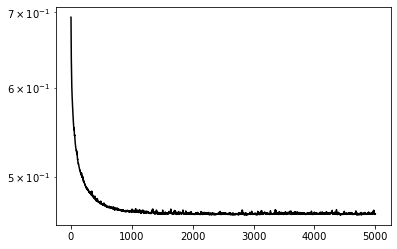

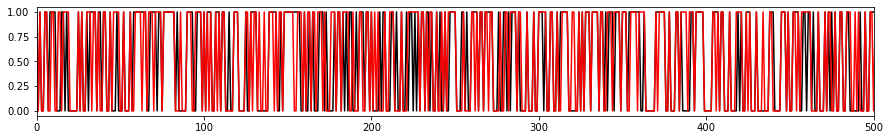

In [7]:
# SGD
batchsize = 1

# Find optimal lr
lr = 1e-2 # 1. / (0.25 * max(np.sum(X**2, axis=1)))
  
pars = pars0.copy()
fun_sgd, acc_sgd = log_reg_sgd(X, y, iters, lr, batchsize, pars, 
                               nobias=nobias, weight_decay=0, hist_step=100)

Iter0, Loss: 0.693147243731013
Iter10000, Loss: 0.562869169401594
Iter20000, Loss: 0.5140003425478535
Iter30000, Loss: 0.4917061581958519
Iter40000, Loss: 0.47799494776125356
Iter50000, Loss: 0.4711270409206107
Iter60000, Loss: 0.4677749376149729
Iter70000, Loss: 0.46567047899956115
Iter80000, Loss: 0.4643919143262667
Iter90000, Loss: 0.4635885340714731
Iter100000, Loss: 0.4630576609940883
Iter110000, Loss: 0.46269305998061044
Iter120000, Loss: 0.4624434748655094
Iter130000, Loss: 0.46226963512874436
Iter140000, Loss: 0.4621467168067611
Iter150000, Loss: 0.4620588451444777
Iter160000, Loss: 0.4619961871102467
Iter170000, Loss: 0.46195121023803176
Iter180000, Loss: 0.4619187355276442
Iter190000, Loss: 0.4618952837982457
Iter200000, Loss: 0.4618782137557253
Iter210000, Loss: 0.46186577712354704
Iter220000, Loss: 0.46185675448467445
Iter230000, Loss: 0.4618501356917456
Iter240000, Loss: 0.46184530828839815
Iter250000, Loss: 0.4618417675100375
Iter260000, Loss: 0.461839179350082
Iter270000

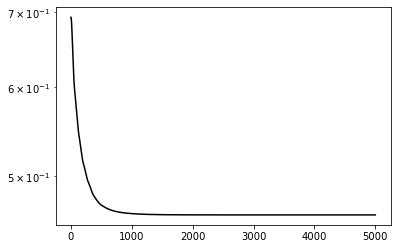

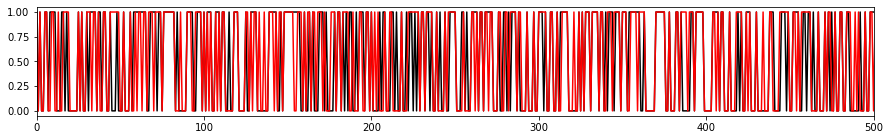

In [8]:
# SAG
batchsize = 1

# Find optimal lr
lr = 1e-2 # 1. / (0.25 * max(np.sum(X**2, axis=1)))
        
pars = pars0.copy()
fun_sag, acc_sag = log_reg_sag(X, y, iters, lr, batchsize, pars, nobias=nobias,
                               adjusted=True, saga=False, weight_decay=0, hist_step=100)

Iter0, Loss: 0.6937859491704128
Iter10000, Loss: 0.5209562900622169
Iter20000, Loss: 0.49537413882993825
Iter30000, Loss: 0.4829933344864343
Iter40000, Loss: 0.47586275058059
Iter50000, Loss: 0.4714933507581521
Iter60000, Loss: 0.46860958028219885
Iter70000, Loss: 0.4666779156984346
Iter80000, Loss: 0.4653571060145772
Iter90000, Loss: 0.4644127680039618
Iter100000, Loss: 0.4637440533752532
Iter110000, Loss: 0.4632504894268315
Iter120000, Loss: 0.462892772992391
Iter130000, Loss: 0.462629098573829
Iter140000, Loss: 0.4624322538843081
Iter150000, Loss: 0.46228529810417796
Iter160000, Loss: 0.46217555667520244
Iter170000, Loss: 0.4620930308084846
Iter180000, Loss: 0.4620308193011836
Iter190000, Loss: 0.4619837996783988
Iter200000, Loss: 0.4619478328436149
Iter210000, Loss: 0.461920682441779
Iter220000, Loss: 0.461899897162974
Iter230000, Loss: 0.461884002682543
Iter240000, Loss: 0.4618718583622884
Iter250000, Loss: 0.4618625842561373
Iter260000, Loss: 0.4618555002638037
Iter270000, Loss: 

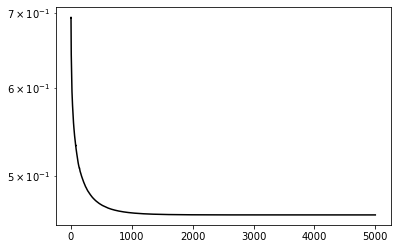

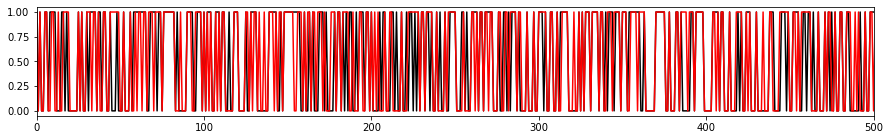

In [9]:
# SAGA
batchsize = 1

# Find optimal lr
lr = 1e-2 # 1. / (0.25 * max(np.sum(X**2, axis=1)))

pars = pars0.copy()
fun_saga, acc_saga = log_reg_sag(X, y, iters, lr, batchsize, pars, nobias=nobias, 
                                 adjusted=True, saga=True, weight_decay=0, hist_step=100)

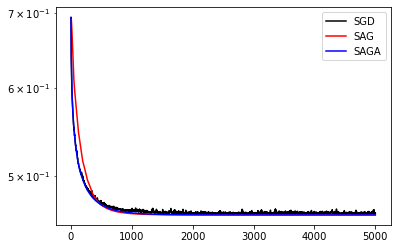

In [10]:
plt.figure()
plt.semilogy(fun_sgd, 'k', label='SGD')
plt.semilogy(fun_sag, 'r', label='SAG')
plt.semilogy(fun_saga, 'b', label='SAGA')
plt.legend();

## RCV1

In [34]:
d = load_svmlight_file('rcv1_train.binary')

# create data
X = np.array(d[0].todense()) # (20242 data points, 47236 features)
X = X[:20224] # to be multiple of 64
y = d[1][:20224]
#X = X[:64*100] # to be multiple of 64
#y = d[1][:64*100]
y[y==-1] = 0

nx, nfeat = X.shape

In [35]:
# define parameters
pars0 = np.random.normal(0,1,nfeat+1)
#pars0 = np.zeros(nfeat+1)
nobias = False

if nobias:
    pars0[-1] = 0 

#### One sample

In [36]:
datapasses = 10  # number of sweeps through all the data. This means that there will datapasses*n stochastic gradient updates
iters = int(datapasses * nx)
iters = 2000

Iter0, Loss: 0.9137498044181256
Iter1000, Loss: 0.6672357740073274
Accuracy 0.8679786392405063


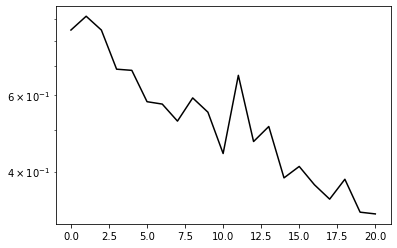

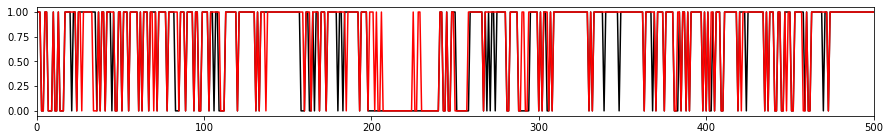

In [37]:
# SGD
batchsize = 1

# Find optimal lr
lr = 1.

pars = pars0.copy()
fun_sgd, acc_sgd = log_reg_sgd(X, y, iters, lr, batchsize, pars, 
                               nobias=nobias, weight_decay=0., hist_step=100, print_step=1000)

Iter0, Loss: 0.8490782738804651
Iter1000, Loss: 0.8225757668045232
Accuracy 0.5440071202531646


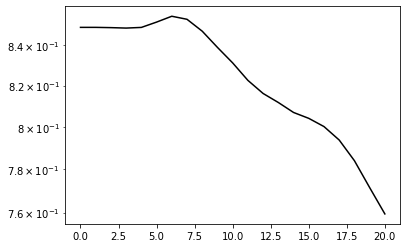

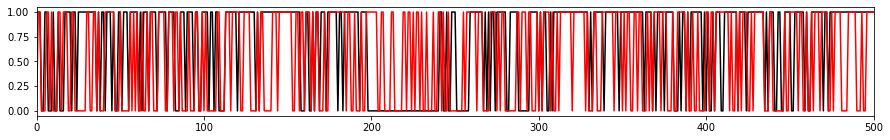

In [38]:
# SAG
batchsize = 1

# Find optimal lr
lr = 1.

pars = pars0.copy()
fun_sag, acc_sag = log_reg_sag(X, y, iters, lr, batchsize, pars, nobias=nobias,
                               adjusted=True, saga=False, weight_decay=0., hist_step=100, print_step=1000)

Iter0, Loss: 0.8720803676289677
Iter1000, Loss: 0.4286484997372886
Accuracy 0.8831091772151899


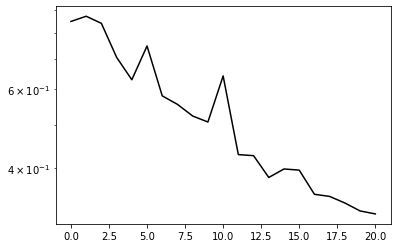

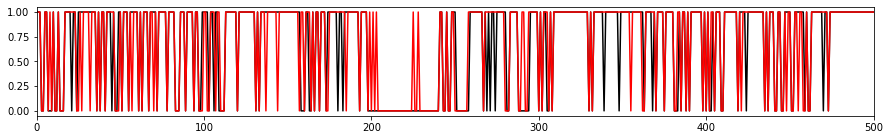

In [39]:
# SAGA
batchsize = 1

# Find optimal lr
lr = 1.

pars = pars0.copy()
fun_saga, acc_saga = log_reg_sag(X, y, iters, lr, batchsize, pars, nobias=nobias,
                                 adjusted=True, saga=True, weight_decay=0., hist_step=100, print_step=1000)

In [ ]:
# LBFGS
def callback(xx, X, y, nobias, fun, fun_hist):
    l = fun(xx)[1]
    fun_hist.append(l)
    
iters_lbfgs = 20
logreg = LogReg(X, y, nobias=nobias)

fun_lbfgs = [logreg.fun(pars)[1], ]
pars = pars0.copy()
sol = minimize(lambda x: logreg.fun(x)[1], pars,
               jac=lambda x: logreg.grad(x), 
               method='L-BFGS-B', options=dict(maxiter=iters_lbfgs),
               callback=lambda x: callback(x, X, y, nobias, logreg.fun, fun_lbfgs))
pars = sol.x

# Predict
ypredtrain = logreg.fun(pars)[0]
ypredtrain = np.where(ypredtrain>0.5, 1, 0)

plt.figure(figsize=(15, 2))
plt.plot(y, 'k')
plt.plot(ypredtrain, 'r')
plt.xlim(0,500);

acc = accuracy_score(y, ypredtrain)
print(f'Accuracy {acc}')

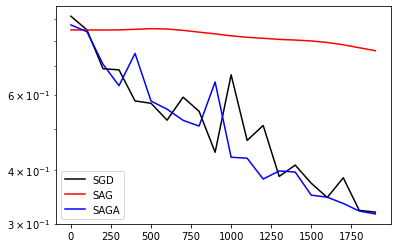

In [41]:
plt.figure()
plt.semilogy(np.arange(0, iters, 100), fun_sgd[1:], 'k', label='SGD')
plt.semilogy(np.arange(0, iters, 100), fun_sag[1:], 'r', label='SAG')
plt.semilogy(np.arange(0, iters, 100), fun_saga[1:], 'b', label='SAGA')
#plt.semilogy(np.arange(0, iters_lbfgs)*nx, fun_lbfgs[1:], 'g', label='LBFGS')
plt.legend();

#### Batched sample

In [ ]:
datapasses = 5  # number of sweeps through all the data. This means that there will datapasses*n stochastic gradient updates
iters = int(datapasses * nx)

In [ ]:
# SGD
batchsize = 32

# Find optimal lr
lr = batchsize / (0.25 * max(np.sum(X**2, axis=1)))
  
pars = pars0.copy()
fun_sgd, acc_sgd = log_reg_sgd(X, y, iters, lr, batchsize, pars, nobias=nobias, weight_decay=1./nx, hist_step=1000)

In [ ]:
# SAG
batchsize = 32

# Find optimal lr
lr = batchsize / (0.25 * max(np.sum(X**2, axis=1)))
 
pars = pars0.copy()
fun_sag, acc_sag = log_reg_sag(X, y, iters, lr, batchsize, pars, nobias=nobias,
                               adjusted=True, saga=False, hist_step=1000)

In [ ]:
plt.figure()
plt.semilogy(fun_sgd, 'k', label='SGD')
plt.semilogy(fun_sag, 'r', label='SAG')
plt.legend();

#### scikit-learn